<a href="https://colab.research.google.com/github/victorhss21/Estudos_CD/blob/main/DataCamp_Fundamentos_de_estat%C3%ADstica_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a Estatística em Python**

## **1) Estatística de Resumo:**

### **00. Conjunto de dados fictícios**

In [ ]:
import pandas as pd
import numpy as np

# Função para gerar dados aleatórios para o volume recebido
def gerar_vol_recebido():
    return np.random.randint(5, 10001)

# Criando um DataFrame com 50 registros
data = pd.DataFrame({
    'id_cliente': range(1, 51),
    'segmento': np.random.choice(['A', 'B', 'C'], size=50),
    'vol_recebido': [gerar_vol_recebido() for _ in range(50)]
})

data.head()

,id_cliente,segmento,vol_recebido
0,1,A,7826
1,2,C,7134
2,3,C,6083
3,4,C,4581
4,5,C,292


### **01. Medidas de tendência central** (resumir grandes conjuntos de dados com valores centrais)

#### **Média** ⟶ Valor médio do conunto de elementos (``np.mean(data)``)

In [ ]:
# Import da biblioteca Numpy
import numpy as np

# Calculando a média o conjunto de dados
media = np.mean(data['vol_recebido'])
print(f'Média: {media}')

Média: 5280.26


#### **Mediana** ⟶ Valor situado no meio dos valores possíveis do conjunto de dados (``np.median(data)``)

In [ ]:
# Import da biblioteca Numpy
import numpy as np

# Calculando a mediana do conjunto de dados
mediana = np.median(data['vol_recebido'])
print(f'Mediana: {mediana}')

Mediana: 4674.5


#### **Moda** ⟶ Valor que ocorre com maior frequência (``statistics.mode(data)``)

In [ ]:
# Import da biblioteca Statistics
import statistics

# Calculando a moda do conjunto de dados
moda = statistics.mode(data['vol_recebido'])
print(f'Moda: {moda}')

Moda: 7826


#### **Importante:** No cenário onde temos dados assimétricos (com a presença de valores extrermos/outliers), a média é bastante sensível e muito afeta. Em contraste, a mediana fornece uma melhor medida de tendência central nesses casos.


### **02. Medidas de dispersão** (Descreve o quão espalhados ou próximos os pontos de dados estão)



#### **Variância** ⟶ Média dos quadrados dos desvios em relação à média (``np.vare(data, ddof=1)``)

> **Forma de calcular**:  
  1. Para cada ponto de dados, subtrai-se a média dos dados (distância do ponto de dados para a média do conjunto, conhecido como _desvio_)
  2. Elava-se ao quadrado cada distância encontrada
  3. Somam-se todas as distância
  4. Divide-se a soma pelo número do conjunto de pontos de dados*
>
> _*$(n-1)$ para conjuntos amostrais e $(n)$ para conjunto populacionais_

In [ ]:
# Import da biblioteca Numpy
import numpy as np

# Calculando a variância do conjunto de dados (considerando um conjunto amostral)
variancia = np.var(data['vol_recebido'], ddof=1)
print(f'Variância: {variancia}')

Variância: 5543760.849387756


  **Cometário 1**: Quando calculamos a variância para um conjunto de dados populacional, devemos dividir a soma das distância ao quadrado pelo número do conjunto de pontos de dados menos um $(n-1)$. Já quando estamos lidando com um conjunto de dados populacionais, devemos dividir pelo número de pontos de dados $(n)$.
  
  A divisão por $(n-1)$ quando estamos lidando com um conjunto amostral, é realizada para que possamos obter uma variância amostral sempre maior que a variância populacional, dado ao medir um parâmetro populacional a partir de uma amostra, temos vieses associados que sempre distanciam o parâmetro estimada a partir da amostra, do valor real do parâmetro populacional... É uma forma de inserir o erro intríseco ao fazer suposições a partir de dados amostrais.

  **Comentário 2**: Quanto maior a variância, mais distante da média do dados os pontos de dados estão.

  **Comentário 3** : A unidade da variância é quadrática, isto é, não reflete a real unidade do conjunto de dados que foi calculado a variância e sim a unidade ao quadrado.

  **Comentário 4**: Devido a variância elevar os valores dos desvios ao quadrado, essa métrica de "espalhamento" penaliza pontos de dados mais distantes da média... Então a presença de outliers tem um efeito significativo na variância

#### **Desvio Padrão** ⟶ Raiz quadrada da variância (``np.std(np.var(data), ddof=1)`` ou ``np.std(data, ddof=1)``)

> **Forma de calcular**:  
  1. Para cada ponto de dados, subtrai-se a média dos dados (distância do ponto de dados para a média do conjunto, conhecido como _desvio_)
  2. Elava-se ao quadrado cada distância encontrada
  3. Somam-se todas as distância
  4. Divide-se a soma pelo número do conjunto de pontos de dados*
  5. Retira-se a raiz quadrado do valor obtido em no passo anterior
>
> _*$(n-1)$ para conjuntos amostrais e $(n)$ para conjunto populacionais_

In [ ]:
# Import da biblioteca Numpy
import numpy as np

# Calculando o desvio padrão do conjunto de dados (considerando um conjunto amostral)
desvio_padrao = np.std(data['vol_recebido'], ddof=1)
print(f'Desvio Padrão: {desvio_padrao}')

Desvio Padrão: 2354.5192395450404


**Comentário 1**: A unidade do desvio padrão (ao contrário da variância) é a mesma da conjunto de dados, isto é, reflete exatamente a real unidade dos dados, tornando sua utilização muito mais aderente, na prática

**Comentário 2**: Quanto maior o desvio padrão, mais distante da média dos dados os pontos de dados estão.

**Comentário 3**: Note que, existe uma relação intríseca entere o _desvio padrão_ e _variância_, um é a raiz quadrada do outro.

**Comentário 4**: Assim como variância, o desvio padrão também penaliza pontos de dados com grandes desvios (isto é, distância em relação a média)... Em outras palavras, é sensível a outliers

#### **Desvio Absoluto Médio** ⟶ Média dos valores absolutos dos devios em relação à média (``np.mean(np.abs(data - np.mean(data)))``

> **Forma de calcular**:  
  1. Para cada ponto de dados, subtrai-se a média dos dados (distância do ponto de dados para a média do conjunto, conhecido como _desvio_)
  2. Considera-se apenas o valor absoluto dos desvios
  3. Somam-se todas as distância
  4. Divide-se a soma pelo número do conjunto de pontos de dados

In [ ]:
# Import da biblioteca Numpy
import numpy as np

# Calculando o devios absoluto médio
desvio_absoluto_medio = np.mean(np.abs(data['vol_recebido'] - np.mean(data['vol_recebido'])))
print(f'Desvio Absoluto Médio: {desvio_absoluto_medio}')

Desvio Absoluto Médio: 2035.0911999999998


**Comentário 1**: De forma intuitiva, essa métrica de dispersão indica o quanto os pontos de dados, na média, se afastam da média do conjunto inteiro.

**Comentário 2**: Uma das principais diferenças dessa métrica em relação a Variância de Desvio Padrão, é que ela penaliza cada ponto de dados igualmente, não importante se seus desvios são maiores (isso acontece porque os desvios não são elevados ao quadrado)... Ou seja, é robusta a outliers.

#### **Intervalo Interquartil** ⟶ Distância entres os valores do Q1 (percentil 25%) e Q3 (percentil 75%) (``np.quantile(data, 0.75) -np.quantile(data, 0.25)) ``

> **Forma de calcular**:  
  1. Calcula-se o valor do 1º Quartil
  2. Calcula-se o valor do 2º Quartil
  3. Subtrai o valor do 2º Quartil e 1º Quartil

In [ ]:
# Import da biblioteca Numpy e Stats
import numpy as np
import scipy.stats as stats

# Calcula IQR (Opção 1)
iqr_1 = np.quantile(data['vol_recebido'], 0.75) - np.quantile(data['vol_recebido'], 0.25)

# Calcula IQR (Opção 2)
iqr_2 = stats.iqr(data['vol_recebido'])

print(f'Intervalo Interquartil (opção 1): {iqr_1}\n')
print(f'Intervalo Interquartil (opção 2): {iqr_2}')

Intervalo Interquartil (opção 1): 3519.25

Intervalo Interquartil (opção 2): 3519.25


#### **Importante**: Não existe medida de dispersão melhor que a outra (especialmente se tratando de _Desvio Padrão_ vs _Desvio Absoluto Médio_), mas para casos onde deseja-se dar maior perso a outliers na mensuração da dispersão dos dados, é interessante utilizar o **Desvio Padrão** ou **Intervalo Interquartil**. Em contrapartida, quando deseja-se uma medida robusta a outliers, é interessante utilizar o **Devio Absoluto Médio** ou **IQR**

### **03. Outliers** (Pontos de dados extremos em relação ao conjunto de dados a qual pertencem)



> **Forma de calcular**:  
  1. Calcula-se o valor do 1º Quartil (Q1)
  2. Calcula-se o valor do 2º Quartil (Q2)
  3. Subtrai o valor do 2º Quartil e 1º Quartil (Intervalo Interquartil ou IQR)
  4. Calcula-se o limite inferior: $Q1 - 1,5 · IQR$
  5. Calcula-se o limite superior: $Q3 + 1,5 · IQR$
  6. Identifica outlier: valores **abaixo** do **limite inferior** ou **acima** do **limite superior**

In [ ]:
# Import do IQR
from scipy.stats import iqr

# Calculando o Q1, Q3 e IQR
q1 = np.quantile(data['vol_recebido'], 0.25)
q3 = np.quantile(data['vol_recebido'], 0.75)
iqr = iqr(data['vol_recebido'])

# Calculando os limites inferiores e superiores
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando valores ouliers
outliers = data[(data['vol_recebido'] < limite_inferior) | (data['vol_recebido'] > limite_superior)]

print(f'Limite Inferior: {limite_inferior}')
print(f'Limite Supeior: {limite_superior}\n')

print(f'Quantidade de outliers: {len(outliers)}')

Limite Inferior: -1679.625
Limite Supeior: 12397.375

Quantidade de outliers: 0


### **Dica:** As principais medidas estatísticas de posição e dispersão, podem ser obtidas de forma facilitada por meio do método ``DataFrame.describe()`` do Pandas, trazendo muito praticidade/produtividade para o dia a dia.

In [ ]:
# Resumo estatístico dos dados
data['vol_recebido'].describe()

,vol_recebido
count,50.00000
mean,5280.26000
std,2354.51924
min,292.00000
25%,3599.25000
50%,4674.50000
75%,7118.50000
max,9126.00000


## **2) Números aleatórios e probabilidade**

### **00. Amostragem**

Existem dois tipos de amostragens:

- Com reposição;
- Sem reposição.

> Em geral, **amostragem com reposição** implica que dois **eventos são independentes** (isto é, a **probabilidade do segundo evento acontecer não é influenciada pelo resultado do primeiro evento**). Ex: sorteio de nomes em uma urna. A cada evento de retirada de um nome, sempre haverá a mesma probabilidade do nome sair, dado que há reposição.

> Em contrapartida, **amostragem sem reposição** implica que dois **eventos não são independentes** (isto é, a **probabilidade do segundo evento acontecer é influenciada pelo resultado do primeiro evento**). Ex: sorteio de nomes em uma urna. A cada evento de retirada de um nome, a probabilidade dos nomes restantes sairem muda (será sempre maior), dado que não há reposição e os nomes possíveis diminuem a cada rodada.

In [ ]:
# Import Numpy
import numpy as np

# Configura semente para reprodutibilidade do experimento
np.random.seed(42)

# Amostragem com reposição
data.sample(5, replace=True)

,id_cliente,segmento,vol_recebido
38,39,C,3766
28,29,A,2870
14,15,C,6406
42,43,A,2927
7,8,B,1500


In [ ]:
# Import Numpy
import numpy as np

# Configura semente para reprodutibilidade do experimento
np.random.seed(42)

# Amostragem sem reposição
data.sample(5, replace=False)

,id_cliente,segmento,vol_recebido
13,14,C,3618
39,40,B,8452
30,31,B,4122
45,46,B,3363
17,18,A,5567


### **01. Distribuição Binomial**

> **Situação Problema:**
>
> Suponha que Amir trabalhe normalmente em 3 vendas por semana e que, no geral, ele ganhe 30% dos negócios em que trabalha. Cada negócio tem um resultado binário: _vendas_ ou _não venda_, portanto, você pode modelar os negócios de vendas dele com uma _distribuição binomial_. Neste exercício, você ajudará Amir a simular um ano de seus negócios (venda/não venda) para que ele possa entender melhor seu desempenho.

Primeiramente, vamos importar as bibliotecas que nos permitem simular a situação:

In [ ]:
# Import numpy
import numpy as np
# Import binom para aplicação da distribuição binomial
from scipy.stats import binom
# Import pandas
import pandas as pd

Em seguida, iremos definir os parâmetros da dsitribuição binomial com base no enunciado da situação problema:

In [ ]:
# Definindo número de tentativas (trails)
n = 3
# Definindo probabilidade de sucesso em cada tentativa
p = 0.3
# Definindo número de experimentos (isto é, número de vezes que as mesmas tentativas serão feitas)
size = 52

Note que as especificações dos parâmetros foram feitas a partir do enunciado e "traduzidos" da seguinte forma:

* `n = 3`: Especifica o número de negócios que Amir tem por semana, isto é, o número de tentativas/oportunidades que ele tem de realizar uma venda (ou não).
* `p = 0.3`: Especifica a taxa/probabilidade de sucesso de Amir em cada venda. Aqui, estamos extraindo diretamente do enunciado, porém possivelmente isso foi obtido a partir de dados históricos das vendas de Amir e obtido uma probabilidade média por venda.
* `size = 52`: Especifica o número de vezes que as N tentativas seram repetidas. Podemos pensar que são 52 experimentos que serão reralizados (no período de 1 ano, a qual é o interesse do problema) e a cada experimentos, Amir realiza 3 tentativas.

Após definir os parâmetros, vamos simular o número de sucesso (vendas) de Amir no período de 1 ano:

In [ ]:
# Definindo semente aleatória para reprodutibilidade da simulação
np.random.seed(42)

# Gerando simulação do número de sucessos (vendas) em 52 semanas (experimentos)
simulacao = binom.rvs(n=n, p=p, size=size)

# Criando dataframe para melhor visualização
df_simulacao = pd.DataFrame(data=simulacao, index=[f'Semana {i}' for i in range(1, 53)], columns=['Qtde Vendas'])

# Printando simulação
print(f'Simulação da quantidade de vendas por semana, ao longo de 52 semanas: \n')
display(df_simulacao.T)

Simulação da quantidade de vendas por semana, ao longo de 52 semanas: 



,Semana 1,Semana 2,Semana 3,Semana 4,Semana 5,Semana 6,Semana 7,Semana 8,Semana 9,Semana 10,...,Semana 43,Semana 44,Semana 45,Semana 46,Semana 47,Semana 48,Semana 49,Semana 50,Semana 51,Semana 52
Qtde Vendas,1,2,1,1,0,0,0,2,1,1,...,0,2,0,1,0,1,1,0,2,1


In [ ]:
# Calculando a média de vendas por semana
df_simulacao.mean()

,0
Qtde Vendas,0.769231


Como podemos observar:
* A simulação deixa claro que, com a taxa/probabilidade de 30% de sucesso (venda) por semana, ao longo de 1 ano, Amir realiza menos de uma venda por semana
* Para ser mais preciso, nessas condições, Amir realiza 0,76 vendas por semana (ao longo de um ano)
* No caso onde Amir deseja aumentar seu número de vendas, existem duas opções: melhorar seu desempenho (aumentar taxa de sucesso) ou realizar mais tentativas na semana (número de negócios o qual partipa na semana). Pois aumentar o número de semana não é uma opção, já que é fixo

> Agora, suponha que estamos interessado em saber a probabilidade de Amir fechar um determinado número de negócios por semana, ainda permanecendo com a mesma taxa/probabilidade de sucesso (30%)

Para calcular a **exata** probabilidade de Amir realizar 3 vendas em 3 tentativas, dado a taxa de sucesso já conhecida é:

In [ ]:
# Definindo número de tentativas (trails)
n = 3
# Definindo probabilidade de sucesso em cada tentativa
p = 0.3
# Definindo número de sucessos (k deve ser menor ou igual a n)
k = 3

In [ ]:
# Clalculando a probailidade de exatos k sucessos em n tentativas, dado a probabilidade de sucesso p
prob_3_vendas = binom.pmf(k=k, n=n, p=p)

# Printa o resultado
print(f'Probabilidade de realizar exatas 3 vendas em 3 tentativas é: {prob_3_vendas}')

Probabilidade de realizar exatas 3 vendas em 3 tentativas é: 0.026999999999999996


Importante notar:
* Para calcular a **probabilidade exata** de `k` sucessos em `n` tentativas, utilizamos a Probability Mass Function (PMF)
* A PMF é um caso especial da PDF (Probability Density Function), que é a generalização da PMF para variáveis aleatórias contínuas, enquanto a PMF se aplica apenas a variáveis aletórias discretas

Para calcular a probabilidade de Amir realizar **até 1 venda** em 3 tentativas, dado a taxa de sucesso já conhecida, é:

In [ ]:
# Definindo número de tentativas (trails)
n = 3
# Definindo probabilidade de sucesso em cada tentativa
p = 0.3
# Definindo número de sucessos (k deve ser menor ou igual a n)
k = 1

In [ ]:
# Clalculando a probailidade de até k sucessos em n tentativas, dado a probabilidade de sucesso p
prob_ate_1_venda = binom.cdf(k=k, n=n, p=p)

# Printa o resultado
print(f'Probabilidade de realizar até 1 venda em 3 tentativas é: {prob_ate_1_venda}')

Probabilidade de realizar até 1 venda em 3 tentativas é: 0.784


Importante notar:
* Para calcular a **probabilidade de até** `k` sucessos em `n` tentativas, utilizamos a Cumulative Distribution Function (CDF), que, como o nome diz, calcula a probabilidade acumulada
* Também é muito útili utilizar o princípio da complementariedade (`1 - probabilidad de ocorrência = probabilidade de não ocorrência`) juntamente com a CDF para obter a probabilidade de enventos, como veremos a seguir

De forma análoga, calcular a probabilidade de Amir realizar **mais que 1 vendas** em 3 tentativas, dado a taxa de sucesso já conhecida, é:

In [ ]:
# Definindo número de tentativas (trails)
n = 3
# Definindo probabilidade de sucesso em cada tentativa
p = 0.3
# Definindo número de sucessos (k deve ser menor ou igual a n)
k = 1

In [ ]:
# Clalculando a probailidade de mais que k sucessos em n tentativas, dado a probabilidade de sucesso p
prob_mais_1_venda = 1 - binom.cdf(k=k, n=n, p=p)

# Printa o resultado
print(f'Probabilidade de realizar mais que 1 venda em 3 tentativas é: {prob_mais_1_venda}')

Probabilidade de realizar mais que 1 venda em 3 tentativas é: 0.21599999999999997


Importante notar:
* Para calcular a **probabilidade de mais que** `k` sucessos em `n` tentativas, utilizamos a Cumulative Distribution Function (CDF) juntamente com o principio da complementariedade

Por fim, podemos ainda estimar o **valor esperado (esperanaça)** de vendas que amir fará a cada semana, dado um aumento na sua taxa de sucesso (probabilidade):

In [ ]:
# Define taxa de sucesso atual (probabilidade)
p_atual = 0.3
# Define taxa de sucesso objetivo (probabilidade)
p_objetivo = 0.37
# Define número de tentativas (negócios onde pode-se ocorrer venda/não venda)
n = 3

In [ ]:
# Calculando o valor esperado de vendas por semana com a taxa de sucesso atual
val_esp_atual = n * p_atual
# Calculando o valor esperado de vendas por semana com a taxa de sucesso atual
val_esp_objetivo = n * p_objetivo

In [ ]:
print(f'Com a taxa de sucesso atual de {p_atual}, o valor esperado de vendas por semana é: {val_esp_atual}')
print(f'Com a taxa de sucesso atual de {p_objetivo}, o valor esperado de vendas por semana é: {val_esp_objetivo}')

Com a taxa de sucesso atual de 0.3, o valor esperado de vendas por semana é: 0.8999999999999999
Com a taxa de sucesso atual de 0.37, o valor esperado de vendas por semana é: 1.1099999999999999


Ou seja, com um aumento de 7% na sua probabilidade de venda (taxa de sucesso), Amir pode reailzar, em média: 1,1 vendas/semana

## **3) Mais distribuições e o Teorema do Limite Central**

### **Distribuição normal**

> **Principais características:**

* Tem o formato característico de sino (bell curve). Por tanto, é **simétrica**: lado direito é a imagem espelhado do esquerdo
* Assim como toda distribuição de probabilidade, a área sob a curva é igual a 1 (100% de probabilidade)
* Existe um tipo especial de distribuição normal: distribuição normal padronizadas. Ela é caraterizada por ter média igual a 0 e desvio padrão igual a 1
* Entretando, é possível sim a existência de distribuições normais não padronizadas (são até mais comuns). Também é possível _pradoniza-las_ a fim de utilizar as propriedades da versão especial padronizada
* A distribuição normal obedece uma regra conhecida como _65-95-99.7_:
  * 68% da área de uma distribuição normal está contido em 1 desvio padrão a partir da média
  * 95% da área de uma distribuição normal está contido em 2 desvio padrão a partir da média
  * 99,7% da área de uma distribuição normal está contido em 3 desvio padrão a partir da média
* A curva da disribuição normal nunca atinge zero em suas extremidades, isto é, é assintótica a zero

> **Situação Problema:**
>
> Suponha que Amir realizou uma determinada quantia de vendas em um período. Cada venda tem um valor diferente, pois ele trabalha com a venda de diferentes produtos. Avaliando a distribuição das vendas de Amir, nota-se que elas segue um padrão normal, com média 5000 dólares e desvio padrão de 2000.

Para modelar a situação, importamos as libs necessárias e especificamos os parâmetros do problema (conforme o enunciado):

In [ ]:
# Importa norm
from scipy.stats import norm

In [ ]:
# Define a média da distribuição normal
mean_dist = 5000
# Define o desvio padrão da distribuição normal
std_dist = 2000

Com base na situação. Qual é a probabilidade de Amir fechar um negócio de valor inferior a US$ 7.500?


In [ ]:
# Calcula a probabilidade de realizar uma venda de valor inferior ao especificado
prob_venda_inf_7500 = norm.cdf(x=7500, loc=mean_dist, scale=std_dist)
# Printa o resultado
print(f'Probabilidade de realizar uma venda de valor inferior a US$ 7.500 é: {prob_venda_inf_7500}')

Probabilidade de realizar uma venda de valor inferior a US$ 7.500 é: 0.8943502263331446


Com base na situação. Qual é a probabilidade de Amir fechar um negócio de valor superior a US$ 1.000?

In [ ]:
# Calcula a probabilidade de realizar uma venda de valor superior ao especificado
prob_venda_sup_1000 = 1 - norm.cdf(x=1000, loc=mean_dist, scale=std_dist)
# Printa o resultado
print(f'Probabilidade de realizar uma venda de valor superior a US$ 1.000 é: {prob_venda_sup_1000}')

Probabilidade de realizar uma venda de valor superior a US$ 1.000 é: 0.9772498680518208


Com base na situação. Qual é a probabilidade de Amir fechar um negócio entre US$ 3.000 e US$ 7.000?

In [ ]:
# Calcula a probabilidade de realizar uma venda de valor superior ao especificado
prob_venda_entre_3000_7000 = norm.cdf(x=7000, loc=mean_dist, scale=std_dist) - norm.cdf(x=3000, loc=mean_dist, scale=std_dist)
# Printa o resultado
print(f'Probabilidade de realizar uma venda de valor entre US$ 3.000 e US$ 7.000 é: {prob_venda_entre_3000_7000}')

Probabilidade de realizar uma venda de valor entre US$ 3.000 e US$ 7.000 é: 0.6826894921370859


Com base no enunciado. 60% das vendas de Amir são até que valor?

In [ ]:
# Calcula o percentil 60 da dsitribuição de vendas de Amir
percentil_60 = norm.ppf(q=0.60, loc=mean_dist, scale=std_dist)
# Printa o resultado
print(f'60% das vendas feitas por Amir estão abaixo do valor: {percentil_60}')

60% das vendas feitas por Amir estão abaixo do valor: 5506.6942062716


As 10% maiores vendas de Amir estão acima de qual valor?

In [ ]:
# Calcula o percentil 90% (100% - 10%) da distribuição de vendas de Amir
percentil_90 = norm.ppf(q=(1-0.1), loc=mean_dist, scale=std_dist)
# Printa o resultado
print(f'As 10% maiores vendas feitas por Amir estão acima do valor: {percentil_90}')

As 10% maiores vendas feitas por Amir estão acima do valor: 7563.103131089201


### **Teorema do Limite Central**

* O Teorema do Limite Central (TLC) se aplica a dados com qualquer distribuição de frequência/probilidade
* A distribuição amostral de uma estatística (média, desvio padrão, proporções, etc...) tende a uma distribuição normal conforme aumenta-se o número de experimentos (isto é, amostras retiradas da população, de onde serão mensuradas as estatísticas)
  > - Quanto maior o tamanho da amostra (número de registros contido nela), mais próxima a distribuição estará de uma distribuição normal. Isso é o cerne do TLC (Mais importante para a normalidade da distribuição das médias)
  >   - Quando você aumenta o tamanho de cada amostra (n), a distribuição das médias amostrais (a distribuição que você obteria se repetisse o processo de amostragem muitas vezes e calculasse a média de cada amostra) se aproxima cada vez mais de uma distribuição normal.
  >   - Em termos práticos: Se você quer usar estatísticas que pressupõem normalidade (como muitos testes de hipóteses e intervalos de confiança), aumentar o tamanho da amostra é uma estratégia fundamental para que a distribuição das médias amostrais seja suficientemente próxima da normal para que essas estatísticas sejam válidas, mesmo que a população original não seja normalmente distribuída.
  > - Quanto maior o número de experimentos (amostras extraídas) mais próxima a média da distribuição das médias amostrais estará da média real (mais importante para a precisão da estimativa da média)
  >   - A "média da distribuição das médias amostrais" é, em termos técnicos, o valor esperado da média amostral. O TLC garante que este valor esperado é igual à média da população real (μ). Em outras palavras, em média, as médias amostrais "acertam" a média populacional.
  >   - Aumentar o número de experimentos (ou seja, coletar mais amostras e calcular mais médias amostrais) não muda a forma da distribuição das médias amostrais (essa forma é determinada principalmente pelo tamanho da amostra, como vimos no ponto 1). No entanto, aumentar o número de amostras permite que você estime com mais precisão a "média da distribuição das médias amostrais" (que é a média populacional).
  >   - Imagine que você está tentando estimar a média populacional usando as médias amostrais. Se você tiver apenas algumas médias amostrais, sua estimativa da média da distribuição das médias amostrais (e, portanto, da média populacional) será menos precisa e mais suscetível a variações aleatórias. Mas, se você tiver muitas médias amostrais, você pode calcular a média dessas médias amostrais e essa média estará muito mais próxima da verdadeira média populacional.

* O TLC só se aplica quando as amostrar retiradas da população são aleatórias/randômicas e independente (na prática, as amostragem devem ser feitas com reposição, para que uma amostra não aletere a probabilidade de seleção de outras)
  > - Entretanto, quando temos uma população suficientemente grande, de forma que a probabilidade de um registro ser selecionado é ínfima e realizar uma amostragem sem reposição aumente a probabilidade de cada registros ser selecionado em uma quantidade também ínfima, é satisfatório premissar que as amostras são independentes (mesmo que sejam amostras sem reposição)
* A média da distribuição normal, após aplicação do LTC, deve ser entendida como uma estimativa da estatísticas na amostra, relativo a população que ela pertence
* O TLC é uma técnica muito útil por três principais motivos:
  > - Para estimar características (estatísticas) de dados amostrais cuja a distribuição dos dados populacionais, não conhecemos!
  > - Para estimar características (estatísticas) de dados populacionais muitos grandes (ou por serem difíceis de coletar, analisar ou caros de obter). Ao invés disso, é possível coletar várias amostras menores e estimar, com boa precisão, estatísticas da população
  > - Para obter uma distribuição normal com características semelhantes de uma distribuição amostral qualquer, cuja há o pressuposto de normalidade para aplicação de algum método estatístico, por exemplo: um teste de hipótese paramétrico


A seguir, vamos simular dados populacionais sintéticos de individuos com idade entre 1 e 99 anos, em seguida extrair K amostras de tamanho N a fim de verificar empiracamente o TLC:

In [ ]:
# Import das libs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  Configura semente aleatória
np.random.seed(0)

In [ ]:
# Define função que gera dados populacionais sintéticos
def gerar_populacao(tamanho_populacao):
    """Gera um conjunto de dados populacionais simulando idades de 1 a 99 anos."""
    np.random.seed(0)
    return np.random.randint(1, 100, tamanho_populacao)

# Define função que extrai K amostras de tamanho N a partir dos dados populacionais
def extrair_amostras(populacao, num_amostras, tamanho_amostra):
    """Extrai K amostras de tamanho N da população."""
    amostras = []
    for _ in range(num_amostras):
        amostra = np.random.choice(populacao, tamanho_amostra, replace=True)
        amostras.append(amostra)
    return amostras

# Define função que calcula estatísticas dos dados amostrais
def calcular_estatisticas_amostras(amostras):
    """Calcula médias, desvios padrões e proporções das amostras."""
    medias_amostrais = []
    desvios_padrao_amostrais = []
    proporcoes_25_35_amostrais = []

    for amostra in amostras:
        medias_amostrais.append(np.mean(amostra))
        desvios_padrao_amostrais.append(np.std(amostra, ddof=1)) # ddof=1 para desvio padrão amostral
        idade_25_35 = np.sum((amostra >= 25) & (amostra <= 35))
        proporcao = idade_25_35 / len(amostra)
        proporcoes_25_35_amostrais.append(proporcao)

    return medias_amostrais, desvios_padrao_amostrais, proporcoes_25_35_amostrais

# Define função que calcula estatísticas dos dados populacionais
def calcular_estatisticas_populacao(populacao):
    """Calcula média, desvio padrão e proporção da população."""
    media_populacional = np.mean(populacao)
    desvio_padrao_populacional = np.std(populacao, ddof=1) # ddof=1 para ser comparável ao amostral se fosse amostra da população maior
    idade_25_35_pop = np.sum((populacao >= 25) & (populacao <= 35))
    proporcao_25_35_populacional = idade_25_35_pop / len(populacao)
    return media_populacional, desvio_padrao_populacional, proporcao_25_35_populacional

--- Estatísticas ---

Estatísticas da População:

  Média Populacional: 50.01
  Desvio Padrão Populacional: 28.54
  Proporção (25-35 anos) Populacional: 0.1115

Estatísticas das Amostras:

  Número de Amostras (K): 100
  Tamanho da Amostra (N): 50

  Média das Médias Amostrais: 50.55
  Desvio Padrão das Médias Amostrais: 4.53
  Proporção Média das Proporções Amostrais (25-35 anos): 0.1088
  Média dos Desvios Padrão Amostrais: 28.52

--- Gráficos ---



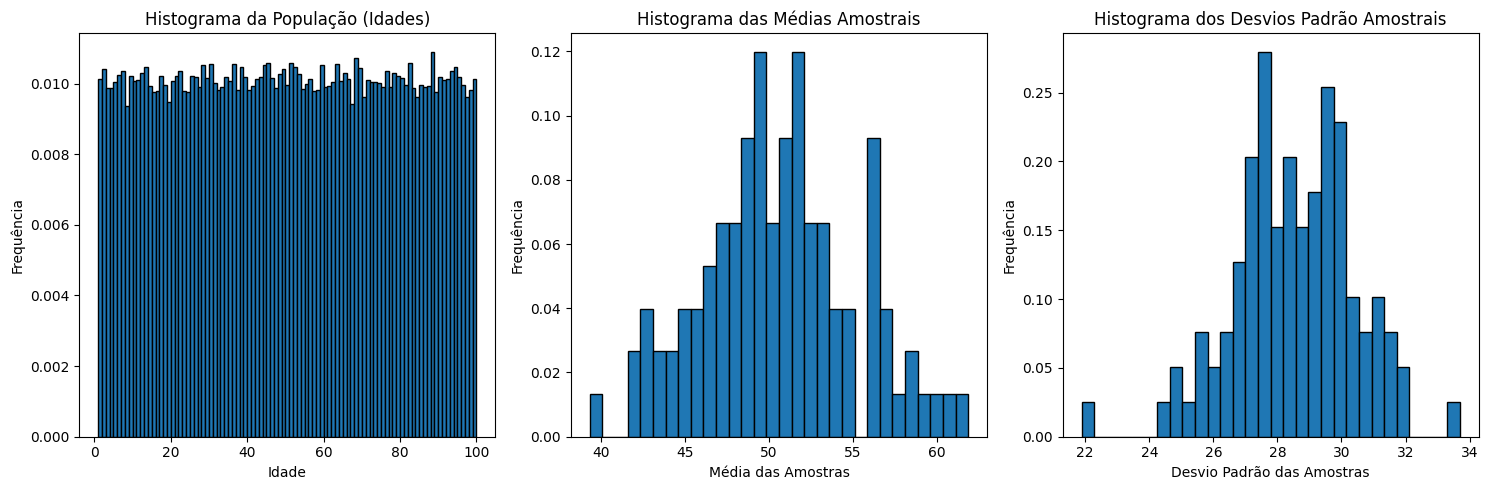

In [ ]:
# Parametros
tamanho_populacao = 100_000
num_amostras_k = 100
tamanho_amostra_n = 50

# Gerar população
populacao = gerar_populacao(tamanho_populacao)

# Extrair amostras
amostras = extrair_amostras(populacao, num_amostras_k, tamanho_amostra_n)

# Calcular estatísticas das amostras
medias_amostrais, desvios_padrao_amostrais, proporcoes_25_35_amostrais = calcular_estatisticas_amostras(amostras)

# Calcular estatísticas da população
media_populacional, desvio_padrao_populacional, proporcao_25_35_populacional = calcular_estatisticas_populacao(populacao)

# Calcular estatísticas das médias amostrais, desvios padrões amostrais e proporções amostrais
media_das_medias_amostrais = np.mean(medias_amostrais)
desvio_padrao_das_medias_amostrais = np.std(medias_amostrais, ddof=1)
proporcao_media_das_proporcoes_amostrais = np.mean(proporcoes_25_35_amostrais)
media_dos_desvios_padrao_amostrais = np.mean(desvios_padrao_amostrais)

# Imprimir e comparar estatísticas
print("--- Estatísticas ---")
print("\nEstatísticas da População:\n")
print(f"  Média Populacional: {media_populacional:.2f}")
print(f"  Desvio Padrão Populacional: {desvio_padrao_populacional:.2f}")
print(f"  Proporção (25-35 anos) Populacional: {proporcao_25_35_populacional:.4f}")

print("\nEstatísticas das Amostras:\n")
print(f"  Número de Amostras (K): {num_amostras_k}")
print(f"  Tamanho da Amostra (N): {tamanho_amostra_n}\n")
print(f"  Média das Médias Amostrais: {media_das_medias_amostrais:.2f}")
print(f"  Desvio Padrão das Médias Amostrais: {desvio_padrao_das_medias_amostrais:.2f}")
print(f"  Proporção Média das Proporções Amostrais (25-35 anos): {proporcao_media_das_proporcoes_amostrais:.4f}")
print(f"  Média dos Desvios Padrão Amostrais: {media_dos_desvios_padrao_amostrais:.2f}")
print("\n--- Gráficos ---\n")

# Gerar histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(populacao, bins=range(1, 101), edgecolor='black', density=True)
plt.title('Histograma da População (Idades)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(medias_amostrais, bins=30, edgecolor='black', density=True)
plt.title('Histograma das Médias Amostrais')
plt.xlabel('Média das Amostras')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(desvios_padrao_amostrais, bins=30, edgecolor='black', density=True)
plt.title('Histograma dos Desvios Padrão Amostrais')
plt.xlabel('Desvio Padrão das Amostras')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

--- Estatísticas ---

Estatísticas da População:

  Média Populacional: 50.01
  Desvio Padrão Populacional: 28.54
  Proporção (25-35 anos) Populacional: 0.1115

Estatísticas das Amostras:

  Número de Amostras (K): 100
  Tamanho da Amostra (N): 500

  Média das Médias Amostrais: 50.07
  Desvio Padrão das Médias Amostrais: 1.17
  Proporção Média das Proporções Amostrais (25-35 anos): 0.1121
  Média dos Desvios Padrão Amostrais: 28.53

--- Gráficos ---



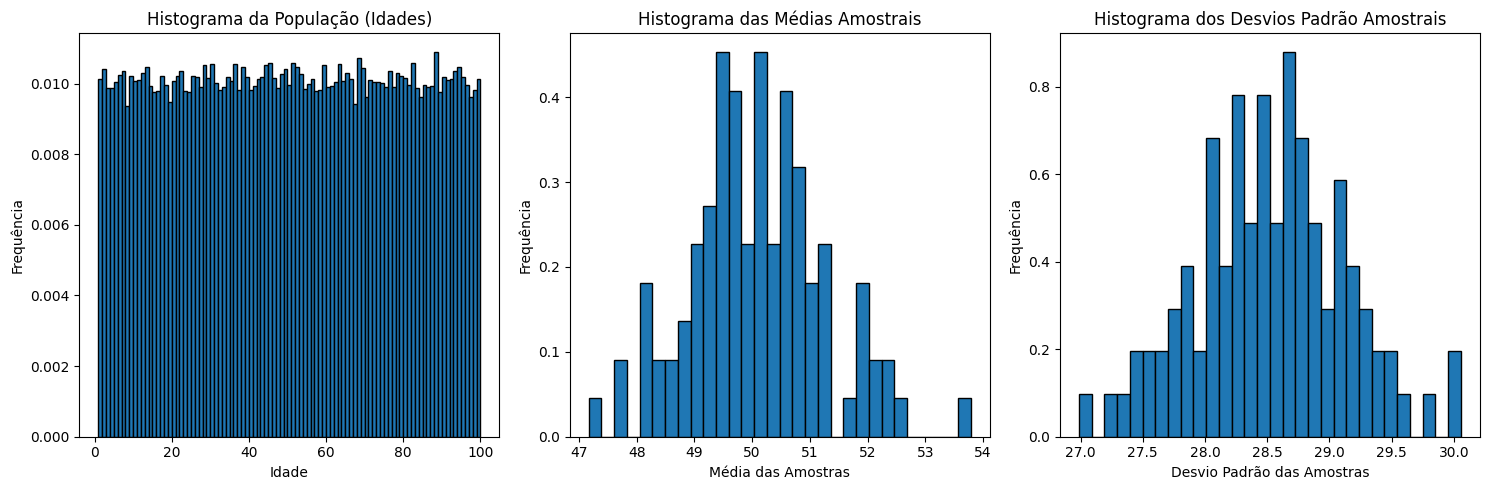

In [ ]:
# Parametros
tamanho_populacao = 100_000
num_amostras_k = 100
tamanho_amostra_n = 500

# Gerar população
populacao = gerar_populacao(tamanho_populacao)

# Extrair amostras
amostras = extrair_amostras(populacao, num_amostras_k, tamanho_amostra_n)

# Calcular estatísticas das amostras
medias_amostrais, desvios_padrao_amostrais, proporcoes_25_35_amostrais = calcular_estatisticas_amostras(amostras)

# Calcular estatísticas da população
media_populacional, desvio_padrao_populacional, proporcao_25_35_populacional = calcular_estatisticas_populacao(populacao)

# Calcular estatísticas das médias amostrais, desvios padrões amostrais e proporções amostrais
media_das_medias_amostrais = np.mean(medias_amostrais)
desvio_padrao_das_medias_amostrais = np.std(medias_amostrais, ddof=1)
proporcao_media_das_proporcoes_amostrais = np.mean(proporcoes_25_35_amostrais)
media_dos_desvios_padrao_amostrais = np.mean(desvios_padrao_amostrais)

# Imprimir e comparar estatísticas
print("--- Estatísticas ---")
print("\nEstatísticas da População:\n")
print(f"  Média Populacional: {media_populacional:.2f}")
print(f"  Desvio Padrão Populacional: {desvio_padrao_populacional:.2f}")
print(f"  Proporção (25-35 anos) Populacional: {proporcao_25_35_populacional:.4f}")

print("\nEstatísticas das Amostras:\n")
print(f"  Número de Amostras (K): {num_amostras_k}")
print(f"  Tamanho da Amostra (N): {tamanho_amostra_n}\n")
print(f"  Média das Médias Amostrais: {media_das_medias_amostrais:.2f}")
print(f"  Desvio Padrão das Médias Amostrais: {desvio_padrao_das_medias_amostrais:.2f}")
print(f"  Proporção Média das Proporções Amostrais (25-35 anos): {proporcao_media_das_proporcoes_amostrais:.4f}")
print(f"  Média dos Desvios Padrão Amostrais: {media_dos_desvios_padrao_amostrais:.2f}")
print("\n--- Gráficos ---\n")

# Gerar histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(populacao, bins=range(1, 101), edgecolor='black', density=True)
plt.title('Histograma da População (Idades)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(medias_amostrais, bins=30, edgecolor='black', density=True)
plt.title('Histograma das Médias Amostrais')
plt.xlabel('Média das Amostras')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(desvios_padrao_amostrais, bins=30, edgecolor='black', density=True)
plt.title('Histograma dos Desvios Padrão Amostrais')
plt.xlabel('Desvio Padrão das Amostras')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### **Dsitribuição de Poisson**

**Características:**

- A distribuição de Poisson modela a **taxa de ocorrência** de **eventos raros** e **aleatórios** em um **intervalo fixo**
- Um dos pressupostos da distribuição de poisson é que os eventos são raros e randômicos. Além disso, que são **independentes (um evento não afeta a probabibilidade do outro ocorrer)**
- A **taxa média de ocorrência** dos eventos deve ser conhecida e **constante** (ou premissada como). Este parâmetro é conhecido como **𝛌 (lambda)** e é o único parâmetro da distribuição

>**Situação Problema:**
>
> Imagine que você é o gerente de operações de um grande data center que hospeda serviços online críticos para diversas empresas. Este data center possui centenas de servidores trabalhando 24 horas por dia, 7 dias por semana. Servidores, como qualquer equipamento, podem apresentar **falhas inesperadas e aleatórias**.
>
> Você observou historicamente que, em média, **durante um período de 24 horas (um dia completo), ocorrem 4 falhas de servidores** no data center. Essas falhas parecem ser **eventos independentes e aleatórios**, não concentradas em momentos específicos do dia e **não relacionadas entre si** (uma falha não causa outra).
>
> **Pergunta 1:** Qual é a probabilidade de que, em um determinado dia (período de 24 horas), ocorram exatamente 7 falhas de servidores no data center?
>
> **Pergunta 2:** Qual é a probabilidade de que, em uma semana, ocorram entre 20 e 28 falhas de servidores no data center?

In [ ]:
# Import das libs
from scipy.stats import poisson

**Pergunta 1:**

In [ ]:
# Define a taxa de ocorrência
taxa_ocorrencia = 4 # (em um intervalo fixo de 24 horas)
# Calcula a probabilidade de ocorrência de 7 falhas
prob_7_falhas = poisson.pmf(k=7, mu=taxa_ocorrencia)
# Printa o resultado
print(f'Probabilidade de ocorrerem 7 falhas em um dia: {prob_7_falhas: .4f}')

Probabilidade de ocorrerem 7 falhas em um dia:  0.0595


**Pergunta 2:**

In [ ]:
# Define a taxa de ocorrência
taxa_ocorrencia = 4 # (em um intervalo fixo de 24 horas)
# Define taxa de ocorrência semanal
taxa_ocorrencia_semanal = taxa_ocorrencia * 7
# Calcula a probabilidade de ocorrência entre 20 e 28 falhas em uma semana
prob_20_28_falhas = poisson.cdf(k=28, mu=taxa_ocorrencia_semanal) - poisson.cdf(k=19, mu=taxa_ocorrencia_semanal)
# Printa o resultado
print(f'Probabilidade de ocorrerem entre 20 e 28 falhas em uma semana: {prob_20_28_falhas: .4f}')

Probabilidade de ocorrerem entre 20 e 28 falhas em uma semana:  0.5022


### **Dsitribuição de Exponencial**

**Características:**

- Modela a probabilidade de um intervalo fixo (espeço, volumes, tempo, etc... Geralmente tempo) entre a ocorrência de eventos de poisson
  - Ex: Qual a probabilidade do intervalo de tempo entre terremotos na California ocorrem entre 6 a 8 meses (supondo conhecimento da taxa de ocorrência média $\lambda$)
- É uma distribuição contínua modelada em função do inverso da taxa de ocorrência média ($1/\lambda$) dos eventos de poisson
- O parâmetro lambda afeta especialmente o decaimento da curva exponencial
	- Quanto **menor o lambda** (taxa de ocorrência), **menor o decaimento** da curva (calda mais "gorda" para a direita)... Que reflete a **maior probabilidade** de **intervalos de tempo maiores** entre eventos
	- Quanto **maior o lambda** (taxa de ocorrência), **maior o decaimento da curva** (calda mais estreita para a direta)... Que reflete a **menor probabilidade** de **intervalor de tempo maiores** entre eventos

> **Situação problema:**
>
> Imagine que você é o gerente de um call center de uma grande empresa de telecomunicações. Este call center recebe um volume constante de ligações de clientes buscando suporte técnico. Você percebeu que o tempo entre as ligações sucessivas que chegam ao call center parece seguir um padrão aleatório.
>
> Após analisar dados históricos, você constatou que, em média, o call center recebe 12 ligações por hora. Você quer entender melhor o tempo de espera entre as ligações e usar essa informação para otimizar o dimensionamento da equipe e o planejamento de recursos.
>
> Perguntas:
>
> 1) Qual é a probabilidade de que o tempo entre duas ligações sucessivas seja menor que 5 minutos?
>
> 2) Qual é a probabilidade de que o tempo entre duas ligações sucessivas seja maior que 10 minutos?
>
> 3) Qual é o tempo médio de espera entre duas ligações sucessivas?

In [ ]:
# Import das libs
from scipy.stats import expon

**Pegunta 1:**

In [ ]:
# Define taxa de ocorrência
taxa_ocorrencia = 12 # em um intervalo fixo de 1 horas
# Calcula a probabilidade do intervalo de tempo entre duas ligações ser menor que 5 min
probabilidade_menor_5_min = expon.cdf(x=5, scale=1/(taxa_ocorrencia/60))
# Printa o resultado
print(f'Probabilidade do intervalo de tempo entre duas ligações ser menor que 5 min: {probabilidade_menor_5_min: .4f}')

Probabilidade do intervalo de tempo entre duas ligações ser menor que 5 min:  0.6321


**Pergunta 2:**

In [ ]:
# Define taxa de ocorrência
taxa_ocorrencia = 12 # em um intervalo fixo de 1 horas
# Calcula a probabilidade do intervalo entre ligações ser maior que 10 minutos
probabilidade_maior_10_min = 1 - expon.cdf(x=10, scale=1/(taxa_ocorrencia/60))
# Printa o resultado
print(f'Probabilidade do intervalo de tempo entre duas ligações ser maior que 10 min: {probabilidade_maior_10_min: .4f}')

Probabilidade do intervalo de tempo entre duas ligações ser maior que 10 min:  0.1353


**Pergunta 3:**


In [ ]:
# Define taxa de ocorrência
taxa_ocorrencia = 12 # em um intervalo fixo de 1 horas
# Calcula o intervalo de tempo médio de espera entre duas ligações
tempo_medio_espera = expon.mean(scale=1/(taxa_ocorrencia/60))
# Printa o resultado
print(f'Tempo médio de espera entre duas ligações: {tempo_medio_espera: .2f} minutos')

Tempo médio de espera entre duas ligações:  5.00 minutos


**Observação:**
- Vale notar que para calcular a probabilidade do intervalo de tempo entre as ligações ser menor que 5 min, nós setamos o parâmetro ``x`` da CDF como $5$ e não $4$
- Acontece que a distribuição exponencial é contínua (ao contrário da distribuição de poisson que é discreta). Isso significa que, por definição, a probabilidade de uma distribuição de probabilidade contínua ser exatamente igual a um valor é zero!
- Logo, significa que $P(x ≤ 5) = P(x < 5)$ pois $P(x = 5)= 0$. Lembre-se que a probabilidade de uma distribuição contínua é a área sob a curva, portanto, a área sob o exato valor 5 é uma linha reta unidimensional, portanto com área zero
- Por esse motivo, setar o parâmetro ``x`` como $4$ não seria adequado, pois estaríamos calculando a probabilidade do intervalo entre as ligações ser menor que 4 min

## **4) Outras distribuições importantes [Extra]**

### **Dsitribuição de t-Studant**

**Características:**

- Distribuição **contínua** e **simétrica em torno da média**, semelhante a uma distribuição normal, porém com **caldas mais "pesadas"** (isto é, mais "gordas", que implica maior probabilidade de valores extremos)
- Modelada em função do número de grau de liberdades (quanto maior o número de graus de liberdade, mais semelhante será a uma distribuição normal)
	- Quanto menor o GL, mais "grossa" é a calda e maior o desvio padrão (pois existem mais valores longe da média)
	- Quanto maior o GL, mais estreita é a calda e menor o desvio padrão (pois existem menos valores longe da média)
- Extremamente útil quando estamos lidando com um **conjunto de dados amostrais pequenos** (n < 30, por convenção) e a **variância da população é desconhecido**
- A distribuição t-student tem algumas principais aplicações práticas:
  - **Testes de Hipóteses:** A distribuição t é amplamente utilizada em testes t (por exemplo, teste t de Student para uma amostra ou amostras independentes), onde a hipótese nula frequentemente se refere à igualdade de médias, considerando a incerteza na estimativa da variância.
  - **Intervalos de Confiança:** Ao construir intervalos de confiança para a média de uma população com variância desconhecida, a distribuição t é empregada para refletir o erro adicional introduzido pela estimação da variância.
  - **Regressão e Modelagem Estatística:** Em modelos de regressão linear, especialmente quando o tamanho da amostra é limitado, a distribuição t é utilizada para inferência sobre os coeficientes, permitindo estimar a significância das variáveis preditoras.
- **Curioridade:** A distribuição t surgiu para resolver problemas práticos onde o tamanho da amostra era pequeno e a variância da população era desconhecida. Foi desenvolvida por William Sealy Gosset (sob o pseudônimo “Student”)

> **Situação problema:**
>
> Imagine que você é um analista de dados em uma empresa de recrutamento especializada em tecnologia. A empresa está expandindo suas operações para uma nova cidade e precisa entender o mercado de trabalho local, especialmente no que diz respeito aos salários de programadores juniores.
>
> Você foi encarregado de estimar o salário médio anual de programadores juniores na nova cidade. Para isso, você coletou uma **amostra aleatória de 30 salários** de programadores juniores que trabalham em diferentes empresas da região. Após coletar os dados, você calcula:
>
> - Média amostral (x̄): R\$ 45.000,00
> - Desvio padrão amostral (s): R\$ 6.000,00
>
> Você sabe que a **média amostral é apenas uma estimativa da verdadeira média populacional** dos salários de todos os programadores juniores na cidade. **Você não conhece o desvio padrão da população** (de todos os salários de programadores juniores da cidade), **apenas o desvio padrão da sua amostra.**
>
> **Questão:**
>
> Com base nos dados da sua amostra e considerando que você não conhece o desvio padrão populacional, construa um intervalo de confiança de 95% para o verdadeiro salário médio anual de programadores juniores na nova cidade.

In [ ]:
# Import das libs
import scipy.stats as stats
import numpy as np

In [ ]:
# --- Dados da Amostra ---
media_amostral = 45000  # Média amostral dos salários (R$)
desvio_padrao_amostral = 6000  # Desvio padrão amostral dos salários (R$)
tamanho_amostra = 30  # Tamanho da amostra

In [ ]:
# --- Nível de Confiança e Significância ---
nivel_confianca = 0.95
alfa = 1 - nivel_confianca
alfa_sobre_2 = alfa / 2

# --- Graus de Liberdade ---
graus_liberdade = tamanho_amostra - 1

In [ ]:
# --- Valor Crítico t (t_alpha/2) ---
# Usando a função percent point function (ppf) da distribuição t para encontrar o valor t crítico
# ppf(1 - alfa_sobre_2, graus_liberdade) nos dá o valor t para a cauda superior alfa/2
valor_critico_t = stats.t.ppf(1 - alfa_sobre_2, graus_liberdade)

# --- Erro Padrão da Média ---
erro_padrao = desvio_padrao_amostral / np.sqrt(tamanho_amostra)

# --- Margem de Erro ---
margem_erro = valor_critico_t * erro_padrao

# --- Intervalo de Confiança ---
limite_inferior = media_amostral - margem_erro
limite_superior = media_amostral + margem_erro

In [ ]:
# --- Exibição dos Resultados ---
print("--- Intervalo de Confiança para o Salário Médio de Programadores Juniores ---\n")
print(f"Média Amostral (x̄): R$ {media_amostral:.2f}")
print(f"Desvio Padrão Amostral (s): R$ {desvio_padrao_amostral:.2f}")
print(f"Tamanho da Amostra (n): {tamanho_amostra}")
print(f"Nível de Confiança: {nivel_confianca*100:.0f}%")
print(f"Graus de Liberdade (gl): {graus_liberdade}")
print(f"Valor Crítico t (t_α/2): {valor_critico_t:.3f}")
print(f"Erro Padrão da Média: R$ {erro_padrao:.2f}")
print(f"Margem de Erro: R$ {margem_erro:.2f}")

print("\n--- Intervalo de Confiança de 95% ---\n")
print(f"Limite Inferior: R$ {limite_inferior:.2f}")
print(f"Limite Superior: R$ {limite_superior:.2f}")
print(f"Intervalo de Confiança: (R$ {limite_inferior:.2f}, R$ {limite_superior:.2f})")

--- Intervalo de Confiança para o Salário Médio de Programadores Juniores ---

Média Amostral (x̄): R$ 45000.00
Desvio Padrão Amostral (s): R$ 6000.00
Tamanho da Amostra (n): 30
Nível de Confiança: 95%
Graus de Liberdade (gl): 29
Valor Crítico t (t_α/2): 2.045
Erro Padrão da Média: R$ 1095.45
Margem de Erro: R$ 2240.44

--- Intervalo de Confiança de 95% ---

Limite Inferior: R$ 42759.56
Limite Superior: R$ 47240.44
Intervalo de Confiança: (R$ 42759.56, R$ 47240.44)


### **Dsitribuição de Geométrica**

**Características:**

- É uma distribuição **discreta** que **modela o número de tentativas necessárias até que ocorra o pimeiro sucesso**, considerando uma **sequência de experimentos de Bernoulli** independentes (a ocorrência de um resultado em um evento, naõ afeta o resultado dos demais eventos)
  - Experimentos de Bernoulli são **experimentos únicos** que possuem apenas **dois resultados** possíveis: *sucesso* ou *fracasso*, com probabilidade $p$ constante de sucesso em cada experimento
  - Note que experimentos de Bernoulli estão diretamente associados também com a distribuição Binomial, pois ela pressupões que múltiplos experimentos de Bernoulli são realizados
- Propriedades
  - **Média (Esperança Matemática):** A média da distribuição geométrica é $ \frac{1}{p} $. Isso indica que, em média, são necessárias $ \frac{1}{p} $ tentativas para obter o primeiro sucesso.
  - **Variância:** A variância é dada por $ \frac{1 - p}{p^2} $, refletindo a dispersão em torno da média.
  - **Memória Ausente:** A distribuição geométrica possui a propriedade de "falta de memória", ou seja, a probabilidade de obter um sucesso após $ k $ tentativas é a mesma, independentemente de quantas falhas já tenham ocorrido. Formalmente,
  
  $$ P(X > m + n \mid X > m) = P(X > n) $$

- A distribuição geométrica é amplamente utilizada em situações onde se deseja modelar o número de tentativas até o primeiro sucesso. Alguns exemplos incluem:
  - **Processos de Fabricação:** Determinar o número de itens produzidos até que um item defeituoso seja encontrado.
  - **Telecomunicações:** Modelar o número de pacotes transmitidos até que ocorra uma falha na transmissão.
  - **Ensaios Clínicos:** Contar o número de pacientes tratados até que se observe o primeiro efeito colateral.

- Relação com Outras Distribuições
  - **Distribuição Binomial Negativa:** A distribuição geométrica é um caso especial da distribuição binomial negativa, onde o número de sucessos desejados é igual a 1.
  - **Distribuição Exponencial:** No caso contínuo, a distribuição exponencial é análoga à distribuição geométrica, modelando o tempo até o primeiro evento em um processo de Poisson.

- Considerações Adicionais
  - **Independência:** As tentativas devem ser independentes, e a probabilidade de sucesso $ p $ deve permanecer constante em cada tentativa.
  - **Início da Contagem:** Algumas definições consideram $ X $ como o número de falhas antes do primeiro sucesso, o que altera a fórmula da pmf para $ P(X = k) = (1 - p)^k \cdot p $, com $ k = 0, 1, 2, \ldots $.
  - **Função de Distribuição Acumulada (CDF):** A função de distribuição acumulada é dada por $ F(k) = 1 - (1 - p)^k $, representando a probabilidade de que o primeiro sucesso ocorra em até $ k $ tentativas.

> **Situação problema:**
>
> Imagine que você é um vendedor que realiza ligações frias para potenciais clientes. Em cada ligação, você tem uma probabilidade de 0.15 (ou 15%) de efetuar uma venda. Assuma que cada ligação é independente das outras e que a probabilidade de sucesso (realizar uma venda) permanece constante para cada ligação. Você continua fazendo ligações até que consiga realizar a sua primeira venda do dia.
>
> Você está interessado em entender a probabilidade de realizar sua primeira venda em um número específico de ligações e o número esperado de ligações necessárias para concretizar a primeira venda.
>
> **Perguntas:**
>
> 1) Qual é a probabilidade de que você realize sua primeira venda exatamente na 3ª ligação?
>
> 2) Qual é a probabilidade de que você realize sua primeira venda em até 5 ligações (ou seja, na 1ª, 2ª, 3ª, 4ª ou 5ª ligação)?
>
> 3) Qual é a probabilidade de que você precise fazer mais de 5 ligações para realizar sua primeira venda?
>
> 4) Em média, quantas ligações você espera fazer para realizar sua primeira venda do dia?

In [ ]:
# Import de libs
from scipy.stats import geom

In [ ]:
# Especifica as informações dos problema
prob_sucesso = 0.15 # Probabilidade de efetuar uma venda

In [ ]:
# 1) Qual é a probabilidade de que você realize sua primeira venda exatamente na 3ª ligação?
num_ligacoes_ate_venda = geom.pmf(k=3, p=prob_sucesso, loc=0)
print(f"Probabilidade de realizar sua primeira venda na 3ª ligação: {num_ligacoes_ate_venda:.4f}")

Probabilidade de realizar sua primeira venda na 3ª ligação: 0.1084


In [ ]:
# 2) Qual é a probabilidade de que você realize sua primeira venda em até 5 ligações (ou seja, na 1ª, 2ª, 3ª, 4ª ou 5ª ligação)?
num_ligacoes_ate_venda = geom.cdf(k=5, p=prob_sucesso, loc=0)
print(f"Probabilidade de realizar sua primeira venda em até 5 ligações: {num_ligacoes_ate_venda:.4f}")

Probabilidade de realizar sua primeira venda em até 5 ligações: 0.5563


In [ ]:
# 3) Qual é a probabilidade de que você precise fazer mais de 5 ligações para realizar sua primeira venda?
num_ligacoes_ate_venda = 1 - geom.cdf(k=5, p=prob_sucesso, loc=0)
print(f"Probabilidade de precisar fazer mais de 5 ligações para realizar sua primeira venda: {num_ligacoes_ate_venda:.4f}")

Probabilidade de precisar fazer mais de 5 ligações para realizar sua primeira venda: 0.4437


In [ ]:
# 4) Em média, quantas ligações você espera fazer para realizar sua primeira venda do dia?
media_ligacoes = geom.mean(p=prob_sucesso, loc=0)
print(f"Número médio de ligações necessárias para realizar sua primeira venda: {media_ligacoes:.2f}")

Número médio de ligações necessárias para realizar sua primeira venda: 6.67


### **Dsitribuição de Qui-Quadrado**

A **distribuição qui‐quadrado** é fundamental na estatística inferencial e se destaca por sua utilidade em diversos testes, principalmente quando trabalhamos com dados categóricos e variâncias. A seguir, um resumo dos principais pontos que um cientista de dados sênior deve dominar:

- Contexto e Origem

  - **Origem e Derivação:**  
  Desenvolvida por Karl Pearson, a distribuição qui‐quadrado surge da soma dos quadrados de variáveis aleatórias independentes que seguem uma distribuição normal padrão. Se $Z_1, Z_2, \dots, Z_k$ são variáveis independentes $N(0,1)$, então  

  $$[
  \chi^2 = Z_1^2 + Z_2^2 + \dots + Z_k^2
  ]$$

  segue uma distribuição qui‐quadrado com $k$ graus de liberdade .

- Propriedades Fundamentais

  - **Domínio e Forma:**  
  A distribuição é contínua, definida para $x \ge 0$ e apresenta assimetria positiva (caudas pesadas à direita). Com o aumento dos graus de liberdade, a assimetria diminui e a distribuição tende a se aproximar de uma normal.

  - **Média e Variância:**  
  A média é igual ao número de graus de liberdade ($\mu = k$) e a variância é $2k$.

  - **Adição de Variáveis:**  
  A soma de duas variáveis qui‐quadrado independentes resulta em outra variável qui‐quadrado, com graus de liberdade somados.

- Aplicações Práticas

  - **Testes de Hipóteses:**  
  Utilizada para construir testes de aderência (goodness-of-fit) e de independência em tabelas de contingência. No teste de Pearson, por exemplo, a estatística é calculada como:
  
  $$
  [\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}]
  $$
  
  onde $O_i$ e $E_i$ são, respectivamente, as frequências observadas e esperadas .

  - **Inferência sobre Variâncias:**  
  Serve para construir intervalos de confiança e testar hipóteses sobre a variância de uma população normal, além de ser base para a derivação de outras distribuições, como a t de Student e a F de Fisher-Snedecor.

  - **Modelagem e Ajuste:**  
  É empregada na verificação do ajuste de modelos estatísticos e na análise de erros, permitindo quantificar a discrepância entre dados observados e valores esperados.

- Considerações Avançadas

  - **Sensibilidade e Convergência:**  
  Para amostras pequenas, a distribuição qui‐quadrado pode apresentar limitações, mas com o aumento dos graus de liberdade (ou tamanho amostral), a sua forma torna-se mais simétrica e a aproximação normal passa a valer.

  - **Interpretação em Contexto:**  
  Um valor de $\chi^2$ muito alto, comparado com o valor crítico da distribuição para um dado nível de significância, leva à rejeição da hipótese nula em testes de aderência ou independência. Entretanto, é essencial avaliar também o tamanho do efeito para determinar a relevância prática dos resultados.

- Conclusão:

  - A distribuição qui‐quadrado é uma ferramenta indispensável na análise estatística, **principalmente para validar modelos e testar associações em dados categóricos**. Seu entendimento profundo – desde a derivação até as aplicações práticas – é crucial para a correta interpretação dos resultados e para a robustez das inferências em contextos de ciência de dados sênior.

> **Situação Problema:**
>
> Uma empresa de pesquisa de mercado está conduzindo um estudo para investigar se existe alguma relação entre a cor dos olhos das pessoas e sua preferência por diferentes marcas de café (Marca A, Marca B, Marca C). Eles coletaram dados de uma amostra aleatória de **500 consumidores** e registraram a cor dos olhos (Azul, Castanho, Verde) e a marca de café preferida de cada participante.
>
> **Dados Coletados (Frequências Observadas):**
>
>Os dados coletados foram organizados em uma tabela de contingência, mostrando as frequências observadas para cada combinação de cor dos olhos e marca de café preferida:
>
>| Cor dos Olhos | Marca A | Marca B | Marca C | Total por Cor dos Olhos |
|---|---|---|---|---|
| Azul        | 65      | 40      | 35      | 140                  |
| Castanho    | 90      | 85      | 75      | 250                  |
| Verde       | 45      | 35      | 30      | 110                  |
| **Total por Marca** | **200**   | **160**   | **140**   | **500**                |
>
>**Problema Específico:**
>
>A empresa de pesquisa quer determinar se a preferência por marca de café é **independente** da cor dos olhos ou se existe alguma **associação** entre essas duas variáveis categóricas.
>
>**Perguntas:**
>
>1.  Existe evidência estatística para sugerir que a cor dos olhos e a preferência por marca de café são **dependentes**?
>2.  Realize um teste de Qui-Quadrado para independência com um nível de significância de **α = 0.05** para responder à pergunta acima.
>3.  Interprete os resultados do teste e conclua sobre a relação entre cor dos olhos e preferência por marca de café.

In [ ]:
# Import das libs
import scipy.stats as stats
import numpy as np

In [ ]:
# Tabela de contingência com frequências observadas
observed_frequencies = np.array([[65, 40, 35],
                                    [90, 85, 75],
                                    [45, 35, 30]])

In [ ]:
# Nível de significância (alpha)
alpha = 0.05

In [ ]:
# --- Realizar o Teste Qui-Quadrado para Independência ---
chi2_statistic, p_value, degrees_freedom, expected_frequencies = stats.chi2_contingency(observed_frequencies)

# --- Critério de Decisão ---
if p_value < alpha:
    decision = "Rejeitar a Hipótese Nula (H0)"
    conclusion = "Há evidências estatísticas para sugerir que a cor dos olhos e a preferência por marca de café são DEPENDENTES."
else:
    decision = "Falhar em Rejeitar a Hipótese Nula (H0)"
    conclusion = "Não há evidências estatísticas suficientes para sugerir que a cor dos olhos e a preferência por marca de café são DEPENDENTES. Não podemos rejeitar a hipótese de INDEPENDÊNCIA."


In [ ]:
# --- Exibição dos Resultados ---
print("\n--- Teste Qui-Quadrado para Independência ---\n")
print(f"Estatística Qui-Quadrado (χ²): {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Graus de Liberdade (gl): {degrees_freedom}")
print("\n--- Frequências Esperadas ---\n")
print(expected_frequencies)
print(f"\n--- Decisão (Nível de Significância α = {alpha}) ---\n")
print(f"Decisão: {decision}")
print(f"Conclusão: {conclusion}")


--- Teste Qui-Quadrado para Independência ---

Estatística Qui-Quadrado (χ²): 4.1250
Valor p: 0.3894
Graus de Liberdade (gl): 4

--- Frequências Esperadas ---

[[ 56.   44.8  39.2]
 [100.   80.   70. ]
 [ 44.   35.2  30.8]]

--- Decisão (Nível de Significância α = 0.05) ---

Decisão: Falhar em Rejeitar a Hipótese Nula (H0)
Conclusão: Não há evidências estatísticas suficientes para sugerir que a cor dos olhos e a preferência por marca de café são DEPENDENTES. Não podemos rejeitar a hipótese de INDEPENDÊNCIA.


#### **Resolução Analítica Passo a Passo do Teste Qui-Quadrado para Independência: Relação entre Cor dos Olhos e Preferência por Marca de Café**

Vamos resolver o problema analiticamente, seguindo os passos do teste de hipóteses Qui-Quadrado para independência.

**1.  Formular as Hipóteses:**

Em um teste de independência Qui-Quadrado, temos sempre as seguintes hipóteses:

*   **Hipótese Nula (H₀):** As variáveis "Cor dos Olhos" e "Preferência por Marca de Café" são **independentes**.  Isto significa que não há associação entre elas; a preferência por marca de café não depende da cor dos olhos.

*   **Hipótese Alternativa (H₁):** As variáveis "Cor dos Olhos" e "Preferência por Marca de Café" são **dependentes**. Isto significa que existe uma associação entre elas; a preferência por marca de café está relacionada à cor dos olhos.

**2.  Calcular as Frequências Esperadas (Eᵢⱼ):**

As frequências esperadas representam o número de observações que esperaríamos em cada célula da tabela de contingência *se as variáveis fossem independentes*.  Para calcular a frequência esperada para cada célula (linha *i*, coluna *j*), usamos a seguinte fórmula:

Eᵢⱼ = (Total da Linha *ᵢ*  *  Total da Coluna *ⱼ*) / Total Geral

Vamos calcular as frequências esperadas para cada célula da nossa tabela:

*   **Célula (Azul, Marca A):**
    E₁₁ = (Total Linha Azul * Total Coluna Marca A) / Total Geral = (140 * 200) / 500 = 28000 / 500 = **56**

*   **Célula (Azul, Marca B):**
    E₁₂ = (Total Linha Azul * Total Coluna Marca B) / Total Geral = (140 * 160) / 500 = 22400 / 500 = **44.8**

*   **Célula (Azul, Marca C):**
    E₁₃ = (Total Linha Azul * Total Coluna Marca C) / Total Geral = (140 * 140) / 500 = 19600 / 500 = **39.2**

*   **Célula (Castanho, Marca A):**
    E₂₁ = (Total Linha Castanho * Total Coluna Marca A) / Total Geral = (250 * 200) / 500 = 50000 / 500 = **100**

*   **Célula (Castanho, Marca B):**
    E₂₂ = (Total Linha Castanho * Total Coluna Marca B) / Total Geral = (250 * 160) / 500 = 40000 / 500 = **80**

*   **Célula (Castanho, Marca C):**
    E₂₃ = (Total Linha Castanho * Total Coluna Marca C) / Total Geral = (250 * 140) / 500 = 35000 / 500 = **70**

*   **Célula (Verde, Marca A):**
    E₃₁ = (Total Linha Verde * Total Coluna Marca A) / Total Geral = (110 * 200) / 500 = 22000 / 500 = **44**

*   **Célula (Verde, Marca B):**
    E₃₂ = (Total Linha Verde * Total Coluna Marca B) / Total Geral = (110 * 160) / 500 = 17600 / 500 = **35.2**

*   **Célula (Verde, Marca C):**
    E₃₃ = (Total Linha Verde * Total Coluna Marca C) / Total Geral = (110 * 140) / 500 = 15400 / 500 = **30.8**

Resumindo as Frequências Esperadas em uma tabela:

| Cor dos Olhos | Marca A | Marca B | Marca C |
|---|---|---|---|
| Azul        | 56      | 44.8    | 39.2    |
| Castanho    | 100     | 80      | 70      |
| Verde       | 44      | 35.2    | 30.8    |

**3.  Calcular a Estatística de Teste Qui-Quadrado (χ²):**

A estatística de teste Qui-Quadrado mede a discrepância entre as frequências observadas (Oᵢⱼ) e as frequências esperadas (Eᵢⱼ) em cada célula da tabela. A fórmula para a estatística Qui-Quadrado é:

χ² = Σ Σ [(Oᵢⱼ - Eᵢⱼ)² / Eᵢⱼ]

Onde a dupla somatória (Σ Σ) indica que somamos sobre todas as células da tabela de contingência. Vamos calcular para cada célula e depois somar:

*   **Célula (Azul, Marca A):**  (65 - 56)² / 56 = (9)² / 56 = 81 / 56 ≈ 1.446
*   **Célula (Azul, Marca B):**  (40 - 44.8)² / 44.8 = (-4.8)² / 44.8 = 23.04 / 44.8 ≈ 0.514
*   **Célula (Azul, Marca C):**  (35 - 39.2)² / 39.2 = (-4.2)² / 39.2 = 17.64 / 39.2 ≈ 0.450
*   **Célula (Castanho, Marca A):** (90 - 100)² / 100 = (-10)² / 100 = 100 / 100 = 1
*   **Célula (Castanho, Marca B):** (85 - 80)² / 80 = (5)² / 80 = 25 / 80 = 0.3125
*   **Célula (Castanho, Marca C):** (75 - 70)² / 70 = (5)² / 70 = 25 / 70 ≈ 0.357
*   **Célula (Verde, Marca A):**  (45 - 44)² / 44 = (1)² / 44 = 1 / 44 ≈ 0.023
*   **Célula (Verde, Marca B):**  (35 - 35.2)² / 35.2 = (-0.2)² / 35.2 = 0.04 / 35.2 ≈ 0.001
*   **Célula (Verde, Marca C):**  (30 - 30.8)² / 30.8 = (-0.8)² / 30.8 = 0.64 / 30.8 ≈ 0.021

Agora somamos todos esses valores para obter a estatística Qui-Quadrado:

χ² ≈ 1.446 + 0.514 + 0.450 + 1 + 0.3125 + 0.357 + 0.023 + 0.001 + 0.021 ≈ **4.1245**

**Valor da Estatística de Teste Qui-Quadrado: χ² ≈ 4.1245**

**4.  Determinar os Graus de Liberdade (gl):**

Para um teste de independência em uma tabela de contingência com *r* linhas e *c* colunas, os graus de liberdade são calculados como:

gl = (Número de Linhas - 1) * (Número de Colunas - 1) = (r - 1) * (c - 1)

No nosso caso, temos 3 cores de olhos (linhas) e 3 marcas de café (colunas), então:

gl = (3 - 1) * (3 - 1) = 2 * 2 = **4**

**Graus de Liberdade: gl = 4**

**5.  Determinar o Valor Crítico Qui-Quadrado (χ²_crítico):**

Precisamos encontrar o valor crítico da distribuição Qui-Quadrado com 4 graus de liberdade para um nível de significância α = 0.05.  Usamos uma tabela de distribuição Qui-Quadrado.

*   Procure na tabela Qui-Quadrado para graus de liberdade = 4 e α = 0.05 (geralmente encontrado na coluna para 0.05 ou 0.95 dependendo da tabela e se é cauda superior ou inferior, para o teste de independência é sempre cauda direita, então procuramos α = 0.05 na cauda superior).

*   O valor crítico Qui-Quadrado para gl = 4 e α = 0.05 é aproximadamente **χ²_crítico = 9.488**.

**Valor Crítico Qui-Quadrado: χ²_crítico ≈ 9.488**

**6.  Tomar a Decisão:**

Comparamos a estatística de teste Qui-Quadrado (χ² ≈ 4.1245) com o valor crítico Qui-Quadrado (χ²_crítico ≈ 9.488).

*   **Regra de Decisão:**
    *   Se χ² ≥ χ²_crítico, Rejeitar H₀.
    *   Se χ² < χ²_crítico, Falhar em Rejeitar H₀.

No nosso caso, χ² ≈ 4.1245 **<** χ²_crítico ≈ 9.488.

Portanto, **Falhamos em Rejeitar a Hipótese Nula (H₀).**

**7.  Conclusão:**

Com base no teste Qui-Quadrado para independência e um nível de significância de 0.05, **não há evidências estatísticas suficientes para rejeitar a hipótese de que a cor dos olhos e a preferência por marca de café são independentes.**

Em outras palavras, não temos evidências para concluir que existe uma associação significativa entre a cor dos olhos e a marca de café preferida com base nesta amostra.  Não podemos descartar a possibilidade de que as preferências por marca de café sejam distribuídas de forma semelhante entre os diferentes grupos de cor de olhos.

**Comparando com o resultado do Python:**

O resultado analítico (Falhar em Rejeitar H₀) e a conclusão são consistentes com o resultado obtido usando Python no exemplo anterior. As pequenas diferenças nos valores da estatística Qui-Quadrado e do valor p (no caso do Python) são devido a arredondamentos nos cálculos manuais e à maior precisão dos cálculos computacionais.